In [194]:
import nltk
import matplotlib.pyplot as plt
from nltk import pos_tag
from sklearn.naive_bayes import GaussianNB
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

In [195]:
from sklearn.naive_bayes import GaussianNB
import string
import re

In [196]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import gensim

In [197]:
from sklearn import metrics

In [198]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [199]:
train_df=pd.read_csv("train.csv")#.apply(lambda x: x.astype(str).str.lower())
test_df=pd.read_csv("test.csv")#.apply(lambda x: x.astype(str).str.lower())
val_df=pd.read_csv("valid.csv")#.apply(lambda x: x.astype(str).str.lower())


In [200]:
y_val = val_df['Label'].astype(int)
y_train = train_df['Label'].astype(int)
X_train = train_df['text'].astype(str).apply(lambda x: x.lower()).apply(word_tokenize)
X_val = val_df['text'].astype(str).apply(lambda x: x.lower()).apply(word_tokenize)


In [201]:
# val_df.dtypes

In [202]:
# train_df.dtypes

In [203]:


def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    text = re.sub(r'[^\w\s]',' ',text)

    # Step 2: Tokenize into words
    words = word_tokenize(text)

    # Step 3: Remove stop words
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # # Step 4: Stemming and Lemmatization
    # stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    # stemmed_words = []
    # for word in words:
    #     stemmed_words.append(stemmer.stem(word))
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(lemmatizer.lemmatize(word))

    # Step 5: Join the words back into a string
    
    preprocessed_text = " ".join(lemmatized_words)

    return preprocessed_text

In [204]:

def create_sentence_embeddings(texts, model):
    sentence_embeddings = []

    for text in texts:
        words = text.split()
        sentence_embedding = np.mean([model[word] for word in words if word in model], axis=0)
        sentence_embeddings.append(sentence_embedding)

    return (sentence_embeddings)

In [ ]:
train_df['preprocess_txt']=train_df['text'].astype(str).apply(preprocess_text)
val_df['preprocess_txt']=val_df['text'].astype(str).apply(preprocess_text)


In [ ]:
vocab=set()
for row in X_train:
  vocab.update(set(row))
  

In [207]:
vocab=list(vocab)
vocabulary_size=len(vocab)

In [208]:
process_sent=list(train_df['preprocess_txt'].apply(word_tokenize).values)

In [209]:
model = Word2Vec(process_sent,vector_size=200, min_count=1)

In [210]:
words=process_sent[0]

sentence_embedding = np.mean(np.array([model.wv[word] for word in words if word in vocab],dtype=object), axis=0)
sentence_embedding

array([0.02389912547207334, -0.025727720219745405, 0.04485218203626573,
       0.14613157014052072, 0.4182516611051849, -0.18341868677331755,
       -0.017040541431419517, 0.5375706525002089, -0.14890873696034154,
       0.1787499616879763, -0.1561587379934887, -0.286541737564322,
       0.06175106061628968, 0.19227625362368095, -0.09323196775383419,
       -0.291254095474465, -0.15679030417878595, -0.02493758683299853,
       0.15625978422920322, -0.566017950574557, 0.18388474779203534,
       -0.30594442650261855, 0.05232887052827411, 0.02104277105536312,
       -0.01607774565410283, -0.2286634802714818, 0.0633424204101579,
       -0.15955318846843308, -0.38075887805057895, 0.1876797478633105,
       0.35187608065704506, 0.10191094094059533, 0.09605315684651335,
       -0.04476173030303067, -0.012886071163747046, 0.13337095562989512,
       0.13749694151596892, -0.12118286727410224, -0.05494392401952711,
       -0.5006428089303275, -0.22953539525365663, -0.07650582656626487,
       -

In [211]:
def create_sentence_embeddings(texts, model,vocab):
    sentence_embeddings = []

    for text in texts:
        words =np.array(text.split())
        sentence_embedding = np.mean(np.array([model.wv[word] for word in words if word in vocab],dtype=object), axis=0)
        sentence_embeddings.append(sentence_embedding)

    return np.array(sentence_embeddings)

In [212]:
X_train_embeddings = create_sentence_embeddings(train_df['preprocess_txt'].astype(str).values, model,vocab)
X_val_embeddings= create_sentence_embeddings(val_df['preprocess_txt'].astype(str).values, model,vocab)

In [ ]:
train_df['preprocess_txt'].astype(str).values[0:2]

array(['say annies list political group support third trimester abortion demand',
       'decline coal start started natural gas took started begin president george w bush administration'],
      dtype=object)

In [ ]:
X_train_embeddings.shape

(10269, 200)

In [213]:
clf = GaussianNB()
clf.fit(X_train_embeddings, y_train)
y_pred=clf.predict(X_val_embeddings)

In [ ]:
y_pred.shape,type(y_pred[0])

((1284,), numpy.int64)

In [214]:
def classifiction_resualts(X_train, y_train,X_val,y_val):
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_val).astype(int)
  
  accuracy = metrics.accuracy_score(y_val, y_pred)
  print('accuracy:',accuracy)
  report = metrics.classification_report(y_val, y_pred)
  print(report)
  
  cm=metrics.confusion_matrix(y_val,y_pred)
  sns.heatmap(cm)
  plt.show()
  return clf

accuracy: 0.19626168224299065
              precision    recall  f1-score   support

           0       0.27      0.05      0.08       263
           1       0.16      0.12      0.14       169
           2       0.21      0.03      0.06       237
           3       0.17      0.05      0.08       248
           4       0.22      0.56      0.32       251
           5       0.16      0.48      0.24       116

    accuracy                           0.20      1284
   macro avg       0.20      0.22      0.15      1284
weighted avg       0.20      0.20      0.15      1284



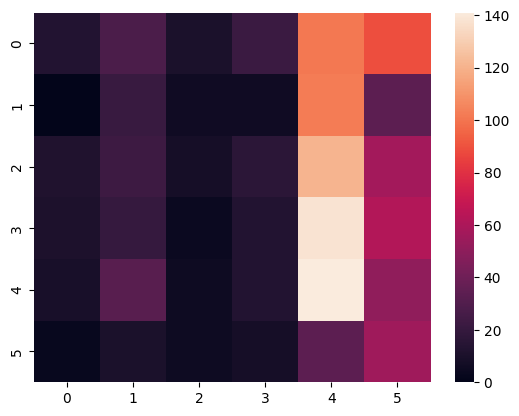

In [215]:
clf=classifiction_resualts(X_train_embeddings, y_train,X_val_embeddings,y_val)

In [ ]:
# val_df['preprocess_txt']=val_df['text'].astype(str).apply(preprocess_text)
# X_val_embeddings = create_sentence_embeddings(val_df['preprocess_txt'].values, model,vocab)

# pos and NER 

In [ ]:
!pip install sklearn_crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 16.7 MB/s eta 0:00:00


In [ ]:
import joblib
import sklearn_crfsuite

In [ ]:
def pos_word2features(sent, i):
    word = sent[i][0]

    features = {
        'bias': 1.0,
        'word': word,
        'len(word)': len(word),
        'word[:4]': word[:4],
        'word[:3]': word[:3],
        'word[:2]': word[:2],
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word[-4:]': word[-4:],
        'word.lower()': word.lower(),
        'word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word.lower()),
        'word.ispunctuation': (word in string.punctuation),
        'word.isdigit()': word.isdigit(),
    }    
    if i > 0:
        word1 = sent[i-1][0]
        features.update({
            '-1:word': word1,
            '-1:len(word)': len(word1),
            '-1:word.lower()': word1.lower(),
            '-1:word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word1.lower()),
            '-1:word[:3]': word1[:3],
            '-1:word[:2]': word1[:2],
            '-1:word[-3:]': word1[-3:],
            '-1:word[-2:]': word1[-2:],
            '-1:word.isdigit()': word1.isdigit(),
            '-1:word.ispunctuation': (word1 in string.punctuation),
        })
    else:
        features['BOS'] = True

    if i > 1:
        word2 = sent[i-2][0]
        features.update({
            '-2:word': word2,
            '-2:len(word)': len(word2),
            '-2:word.lower()': word2.lower(),
            '-2:word[:3]': word2[:3],
            '-2:word[:2]': word2[:2],
            '-2:word[-3:]': word2[-3:],
            '-2:word[-2:]': word2[-2:],
            '-2:word.isdigit()': word2.isdigit(),
            '-2:word.ispunctuation': (word2 in string.punctuation),
        })

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        features.update({
            '+1:word': word1,
            '+1:len(word)': len(word1),
            '+1:word.lower()': word1.lower(),
            '+1:word[:3]': word1[:3],
            '+1:word[:2]': word1[:2],
            '+1:word[-3:]': word1[-3:],
            '+1:word[-2:]': word1[-2:],
            '+1:word.isdigit()': word1.isdigit(),
            '+1:word.ispunctuation': (word1 in string.punctuation),
        })

    else:
        features['EOS'] = True    
    if i < len(sent) - 2:
        word2 = sent[i+2][0]
        features.update({
            '+2:word': word2,
            '+2:len(word)': len(word2),
            '+2:word.lower()': word2.lower(),
            '+2:word.stemmed': re.sub(r'(.{2,}?)([aeiougyn]+$)',r'\1', word2.lower()),
            '+2:word[:3]': word2[:3],
            '+2:word[:2]': word2[:2],
            '+2:word[-3:]': word2[-3:],
            '+2:word[-2:]': word2[-2:],
            '+2:word.isdigit()': word2.isdigit(),
            '+2:word.ispunctuation': (word2 in string.punctuation),
        })

    return features


def pos_sent2features(sent):
    return [pos_word2features(sent, i) for i in range(len(sent))]

def pos_sent2labels(sent):
    return [word[1] for word in sent]

def pos_sent2tokens(sent):
    return [word[0] for word in sent]

In [ ]:

def ner_word2features(sent, i, word2cluster):
    word = sent[i][0]
    postag = sent[i][1]
    features = [
        'bias',
        'word.lower=' + word.lower(),
        'word[-3:]=' + word[-3:],
        'word[-2:]=' + word[-2:],
        'word.isupper=%s' % word.isupper(),
        'word.istitle=%s' % word.istitle(),
        'word.isdigit=%s' % word.isdigit(),
        'word.cluster=%s' % word2cluster[word.lower()] if word.lower() in word2cluster else "0",
        'postag=' + postag
    ]
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.extend([
            '-1:word.lower=' + word1.lower(),
            '-1:word.istitle=%s' % word1.istitle(),
            '-1:word.isupper=%s' % word1.isupper(),
            '-1:postag=' + postag1
        ])
    else:
        features.append('BOS')

    if i > 1: 
        word2 = sent[i-2][0]
        postag2 = sent[i-2][1]
        features.extend([
            '-2:word.lower=' + word2.lower(),
            '-2:word.istitle=%s' % word2.istitle(),
            '-2:word.isupper=%s' % word2.isupper(),
            '-2:postag=' + postag2
        ])        

        
    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.extend([
            '+1:word.lower=' + word1.lower(),
            '+1:word.istitle=%s' % word1.istitle(),
            '+1:word.isupper=%s' % word1.isupper(),
            '+1:postag=' + postag1
        ])
    else:
        features.append('EOS')

    if i < len(sent)-2:
        word2 = sent[i+2][0]
        postag2 = sent[i+2][1]
        features.extend([
            '+2:word.lower=' + word2.lower(),
            '+2:word.istitle=%s' % word2.istitle(),
            '+2:word.isupper=%s' % word2.isupper(),
            '+2:postag=' + postag2
        ])

        
    return features



def ner_sent2features(sent, word2cluster):
    return [ner_word2features(sent, i, word2cluster) for i in range(len(sent))]

def ner_sent2labels(sent):
    return [label for token, postag, label in sent]

def ner_sent2tokens(sent):
    return [token for token, postag, label in sent]
    

In [ ]:
pos_crf=joblib.load('pos_crf_model')
ner_crf=joblib.load('crf_model_ner')


In [ ]:
! wget https://raw.githubusercontent.com/nlptown/nlp-notebooks/master/data/embeddings/clusters_nl.tsv

--2023-05-15 05:07:39--  https://raw.githubusercontent.com/nlptown/nlp-notebooks/master/data/embeddings/clusters_nl.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459810 (449K) [text/plain]
Saving to: ‘clusters_nl.tsv’

clusters_nl.tsv     100%[===================>] 449.03K  --.-KB/s    in 0.04s   

2023-05-15 05:07:39 (11.2 MB/s) - ‘clusters_nl.tsv’ saved [459810/459810]



In [ ]:
def read_clusters(cluster_file):
    word2cluster = {}
    with open(cluster_file) as i:
        for line in i:
            word, cluster = line.strip().split('\t')
            word2cluster[word] = cluster
    return word2cluster
word2cluster=read_clusters("clusters_nl.tsv")

In [ ]:
# tags=ner_imp_words.apply(lambda x :[x]).apply(pos_crf.predict)
#     pos_tags=[[(x,y) for x,y in zip(sublist1, sublist2)] \
#                   for sublist1, sublist2 in \
#              zip(ner_imp_words.values,tags.apply(lambda x:x[0]).values)]
    
#     # pos_tags = [(x,y) for x,y in zip(tokens,pos_crf.predict(pos_sent2features([text]))[0])]

#     pos_words = [word for word, tag in pos_tags if tag.startswith('N') or tag.startswith('V') or tag.startswith('J')]

#     # ner_preds=ner_crf.predict([ner_sent2features(pos_tags, word2cluster)])[0]
#     ner_preds=ner_imp_words.apply(lambda x :[x]).apply(ner_crf.predict)
#     ner_tags=[[(x,y) for x,y in zip(sublist1, sublist2)] \
#                         for sublist1, sublist2 in\
#         zip(ner_imp_words.values,ner_preds.apply(lambda x:x[0]).values)]

#     named_entities = [ word for word, label in  sentence for sentence in ner_tags\
#                       if label.startswith('PER') or label.startswith('ORG')\
#                       or label.startswith('LOC')]

In [ ]:
def pos_ner_preprocess_text(text,word2cluster=word2cluster,use_pos=True,use_ner=True):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    
    
    # POS tags list of (word, tag)
    
    pos_words=[]
    named_entities=[]


    
    pos_tags = [(x,y) for x,y in zip(tokens,pos_crf.predict(pos_sent2features([text]))[0])]

    pos_words = [word for word, tag in pos_tags if tag.startswith('N') or tag.startswith('V') or tag.startswith('J')]

    ner_preds=ner_crf.predict([ner_sent2features(pos_tags, word2cluster)])[0]
    ner_tags=[(x,y) for x,y in zip(tokens,ner_preds)]

    named_entities = [ word for word, label in  ner_tags\
                      if label.startswith('PER') or label.startswith('ORG')\
                      or label.startswith('LOC')]

    if use_pos and use_ner:
        important_words=named_entities + pos_words
    elif use_pos:
        important_words=pos_words
         
    elif use_ner:
        important_words=named_entities 
    else:
        important_words=X_train_embeddings
    

    # Filter out stop words from outputs
    stop_words = set(stopwords.words('english'))
    important_words = [word for word in important_words if word not in stop_words and word.isalpha()]
    if not important_words:
      important_words=tokens
    return important_words

In [186]:
def imp_word_embedding(texts,w2v_model,vocab,use_pos=True,use_ner=True):
    # Preprocess the text and extract the relevant words
  sentence_embeddings=[]
  for text in texts:
    imp_words = pos_ner_preprocess_text(text,use_pos=True,use_ner=True)
    # if imp_wrods
    # Calculate the word embeddings for the relevant words
    embeddings=[w2v_model.wv[word] for word in imp_words if word in vocab]
    if not embeddings:
      words =np.array(text.split())
      sentence_embed = np.mean(np.array([model.wv[word] for word in words \
                                             if word in vocab],dtype=object), axis=0)
    else:
      sentence_embed = np.mean(embeddings, axis=0)
    
    #  [model.wv[word] for wonamed_entities = [ent for ent in doc.ents if ent.label_.startswith('PER') or ent.label_.startswith('ORG') or ent.label_.startswith('LOC')]rd in pos_words]
    sentence_embeddings.append(sentence_embed)
      
   
    
  return sentence_embeddings

In [ ]:
ner_imp_words=train_df['text'].astype(str).apply(pos_ner_preprocess_text)
model = Word2Vec(ner_imp_words,vector_size=200, min_count=1)



In [ ]:
np_vocab=set()
for row in ner_imp_words:#train_df['text'].astype(str):
  np_vocab.update(set(row))
np_vocab=list(np_vocab)#+vocab

In [151]:
embedding=imp_word_embedding(train_df['text'].astype(str),model,np_vocab,use_pos=True,use_ner=True)

In [157]:
np.array(embedding).shape

(10269, 200)

In [175]:
X_val_embeddings

array([array([ 3.53150372e-03,  6.05767011e-04, -2.32094666e-03,  6.30014925e-04,
               2.22346932e-03, -7.69553334e-03, -4.27765446e-03,  2.70561618e-03,
              -9.75333911e-04,  2.48491927e-03, -2.60828692e-03, -5.09469630e-03,
              -7.47565646e-04, -1.49146456e-03, -3.36637138e-03, -7.38778478e-03,
              -5.01781423e-03, -3.43144056e-03, -1.12963736e-03, -5.23821311e-03,
               4.12873784e-03, -3.93770635e-03,  3.65790469e-03,  5.10250311e-03,
               4.41093650e-03, -5.15312376e-03, -4.33609216e-03, -7.43550295e-03,
              -7.23754801e-03, -3.97803989e-04,  7.80313089e-03, -1.75422092e-03,
              -1.36560376e-03,  1.60220196e-03,  5.11653442e-03,  1.25342875e-03,
               5.59153175e-03, -3.81212588e-03,  1.63789443e-03, -8.91416892e-03,
               2.43599154e-03, -6.52885006e-04, -4.75064665e-03,  4.91726911e-03,
               3.75617994e-03,  2.31721860e-04, -2.97319563e-03, -6.33343298e-04,
               1

In [183]:
X_val_embeddings= np.array(imp_word_embedding(val_df['text'].astype(str),model,\
                                           np_vocab,use_pos,use_ner))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-183-8e7eb74b7f70>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_val_embeddings= np.array(imp_word_embedding(val_df['text'].astype(str),model,\


In [184]:
X_val_embeddings

array([array([ 3.53150372e-03,  6.05767011e-04, -2.32094666e-03,  6.30014925e-04,
               2.22346932e-03, -7.69553334e-03, -4.27765446e-03,  2.70561618e-03,
              -9.75333911e-04,  2.48491927e-03, -2.60828692e-03, -5.09469630e-03,
              -7.47565646e-04, -1.49146456e-03, -3.36637138e-03, -7.38778478e-03,
              -5.01781423e-03, -3.43144056e-03, -1.12963736e-03, -5.23821311e-03,
               4.12873784e-03, -3.93770635e-03,  3.65790469e-03,  5.10250311e-03,
               4.41093650e-03, -5.15312376e-03, -4.33609216e-03, -7.43550295e-03,
              -7.23754801e-03, -3.97803989e-04,  7.80313089e-03, -1.75422092e-03,
              -1.36560376e-03,  1.60220196e-03,  5.11653442e-03,  1.25342875e-03,
               5.59153175e-03, -3.81212588e-03,  1.63789443e-03, -8.91416892e-03,
               2.43599154e-03, -6.52885006e-04, -4.75064665e-03,  4.91726911e-03,
               3.75617994e-03,  2.31721860e-04, -2.97319563e-03, -6.33343298e-04,
               1

use_ner: True use_pos: True
accuracy: 0.1609699094361671
              precision    recall  f1-score   support

           0       0.29      0.00      0.01      1998
           1       0.25      0.05      0.09      1683
           2       0.17      0.29      0.21      1657
           3       0.25      0.05      0.09      2123
           4       0.22      0.29      0.25      1966
           5       0.10      0.46      0.16       842

    accuracy                           0.16     10269
   macro avg       0.21      0.19      0.13     10269
weighted avg       0.23      0.16      0.13     10269



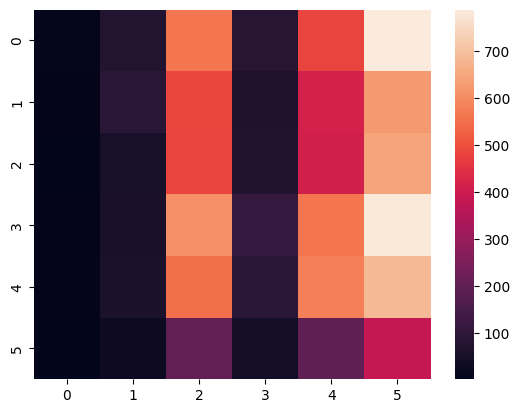

use_ner: True use_pos: False
accuracy: 0.1609699094361671
              precision    recall  f1-score   support

           0       0.29      0.00      0.01      1998
           1       0.25      0.05      0.09      1683
           2       0.17      0.29      0.21      1657
           3       0.25      0.05      0.09      2123
           4       0.22      0.29      0.25      1966
           5       0.10      0.46      0.16       842

    accuracy                           0.16     10269
   macro avg       0.21      0.19      0.13     10269
weighted avg       0.23      0.16      0.13     10269



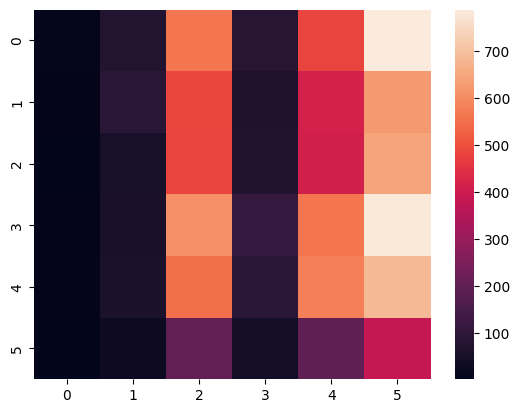

use_ner: False use_pos: True
accuracy: 0.1609699094361671
              precision    recall  f1-score   support

           0       0.29      0.00      0.01      1998
           1       0.25      0.05      0.09      1683
           2       0.17      0.29      0.21      1657
           3       0.25      0.05      0.09      2123
           4       0.22      0.29      0.25      1966
           5       0.10      0.46      0.16       842

    accuracy                           0.16     10269
   macro avg       0.21      0.19      0.13     10269
weighted avg       0.23      0.16      0.13     10269



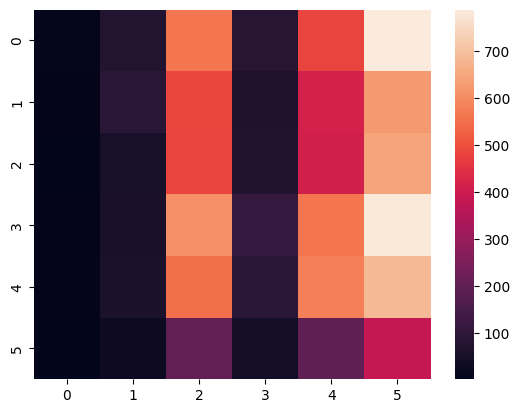

In [193]:

for use_ner in [True,False]:
  for use_pos in [True,False]:
    if not use_ner and not use_pos:
      pass
    else:
      
    
      X_train_embeddings =np.array( imp_word_embedding(train_df['text'].astype(str),model,\
                                              np_vocab,use_pos,use_ner))
      X_val_embeddings= np.array(imp_word_embedding(train_df['text'].astype(str),model,\
                                           np_vocab,use_pos,use_ner))
      print("use_ner:",use_ner,"use_pos:",use_pos)
      clf=classifiction_resualts(X_train_embeddings, y_train,X_val_embeddings,y_train)#y_val)


In [ ]:
# X_train_embeddings = imp_word_embedding(train_df['text'].astype(str).values, model,np_vocab,
#                                                   use_pos,use_ner)

In [180]:

# for use_ner in [True,False]:
#   for use_pos in [True,False]:
#     if not use_ner and not use_pos:
#       pass
#     else:
    
#       X_train_embeddings = imp_word_embedding(train_df['text'].astype(str).values, model,vocab,
#                                                   use_pos,use_ner)
#       X_val_embeddings= imp_word_embedding(val_df['text'].astype(str).values, model,vocab,
#                                                 use_pos,use_ner)
#       print("use_ner:",use_ner,"use_pos:",use_pos)
#       clf=classifiction_resualts(X_train_embeddings, y_train,X_val_embeddings,y_val)


NameError: ignored

In [ ]:
# embedding = sentence_embedding()